In [30]:
#1. Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['day_name'] = df['hour_beginning'].dt.day_name()
df['hour'] = df['hour_beginning'].dt.hour

In [26]:
df.head(5)

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day_name
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday


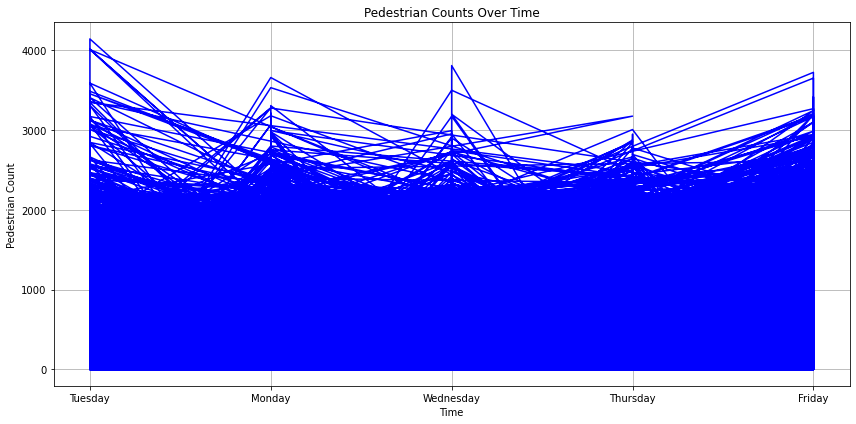

In [18]:
df_weekday = df[df['hour_beginning'].apply(lambda x: x.isoweekday())<=5]
df_weekday=df_weekday.reset_index(drop=True)

plt.figure(figsize=(12,6))
plt.plot(df_weekday['day_name'], df_weekday['Pedestrians'], color='blue')
plt.title('Pedestrian Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
pd.Categorical(df.weather_summary).codes

array([-1,  2,  2, ...,  0,  4,  2], dtype=int8)

C:\Users\thy10\AppData\Local\Temp/ipykernel_2748/2209199376.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['weather_code'] = pd.Categorical(df_2019.weather_summary).codes


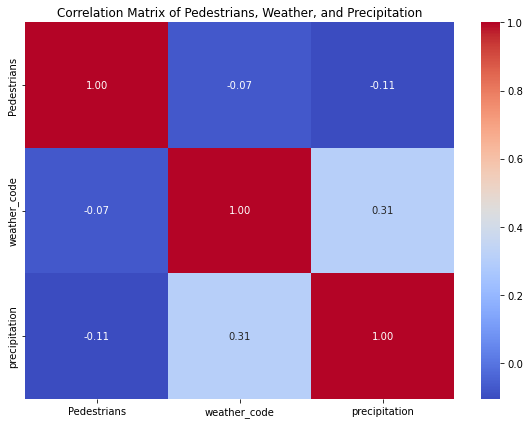

In [29]:
# 2. Track pedestrian counts on the Brooklyn Bridge for the year 2019
# and analyze how different weather conditions influence pedestrian
# activity in that year. Sort the pedestrian count data by weather
# summary to identify any correlations( with a correlation matrix)
# between weather patterns and pedestrian counts for the selected year.

# -This question requires you to show the relationship between a
# numerical feature(Pedestrians) and a non-numerical feature(Weather
# Summary). In such instances we use Encoding. Each weather condition
# can be encoded as numbers( 0,1,2..). This technique is called One-hot
# encoding.

# -Correlation matrices may not always be the most suitable
# visualization method for relationships involving categorical
# datapoints, nonetheless this was given as a question to help you
# understand the concept better.

df_2019 = df[df['hour_beginning'].dt.year==2019]
df_2019['weather_code'] = pd.Categorical(df_2019.weather_summary).codes

correlation_matrix = df_2019[['Pedestrians', 'weather_code', 'precipitation']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrians, Weather, and Precipitation')
plt.tight_layout()
plt.show()

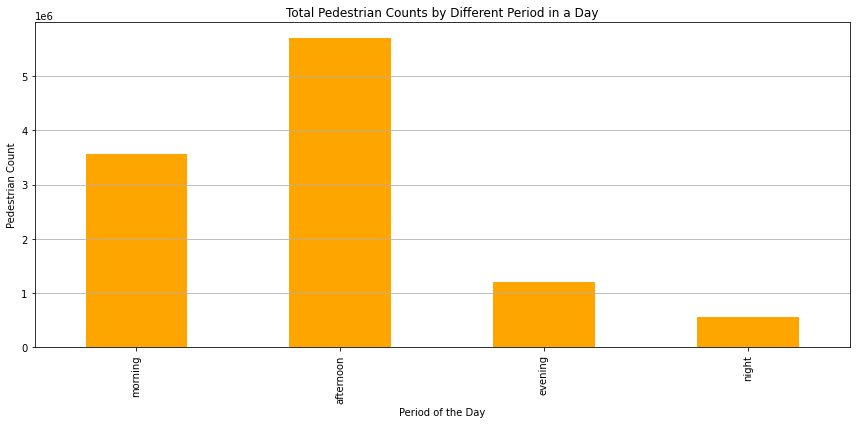

In [34]:
# 3. Implement a custom function to categorize time of day into morning,
# afternoon, evening, and night, and create a new column in the
# DataFrame to store these categories. Use this new column to analyze
# pedestrian activity patterns throughout the day.

def time_of_day(time):
    if time>=6 and time<=12:
        return "morning"
    if time>12 and time <=17:
        return "afternoon"
    if time>17 and time <=19:
        return "evening"
    return "night"
        

df['time_of_day'] = df['hour'].apply(lambda x:time_of_day(x))

time_periods = ['morning', 'afternoon', 'evening', 'night']


time_cnt = df.groupby(df['time_of_day'])['Pedestrians'].sum()
plt.figure(figsize=(12,6))
time_cnt = time_cnt.reindex(time_periods)
time_cnt.plot(kind='bar',color='orange')
plt.title('Total Pedestrian Counts by Different Period in a Day')
plt.xlabel('Period of the Day')
plt.ylabel('Pedestrian Count')
plt.grid(axis='y')  #grid created alone y axis
plt.tight_layout()
plt.show()